In [ ]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

import pprint

### dict 편하게 보기 

In [141]:
def view_index(n,doc):
    for key,value in dict(doc.iloc[n]).items():
        print(f'{key} :  {value}')

In [3]:
train_df=pd.read_csv('./dataset/train/train.csv')
test_df=pd.read_csv('./dataset/test/test_data.csv')

In [7]:
train_df.head(3)

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree


In [8]:
test_df.head(3)

,id,sentence,subject_entity,object_entity,label,source
0,0,지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.,"{'word': 'MBC', 'start_idx': 7, 'end_idx': 9, ...","{'word': '탐사기획 스트레이트', 'start_idx': 12, 'end_i...",100,wikitree
1,1,사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...,"{'word': '프린세스 프링', 'start_idx': 7, 'end_idx':...","{'word': '공주', 'start_idx': 84, 'end_idx': 85,...",100,wikipedia
2,2,"한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...","{'word': '경찰', 'start_idx': 121, 'end_idx': 12...","{'word': '1995년', 'start_idx': 31, 'end_idx': ...",100,wikipedia


# attribute 살펴보기

In [45]:
train_df.columns

Index(['id', 'sentence', 'subject_entity', 'object_entity', 'label', 'source'], dtype='object')

In [102]:
#no relation
for key,value in dict(train_df.iloc[0]).items():
    print(f'{key} :  {value}')
    

id :  0
sentence :  〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.
subject_entity :  {'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}
object_entity :  {'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}
label :  no_relation
source :  wikipedia


In [79]:
#org:member_of
for key,value in dict(train_df.iloc[2]).items():
    print(f'{key} :  {value}')

id :  2
sentence :  K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터 관중 유치 성과와 마케팅 성과를 인정받아 ‘풀 스타디움상’과 ‘플러스 스타디움상’을 수상했다.
subject_entity :  {'word': '광주FC', 'start_idx': 21, 'end_idx': 24, 'type': 'ORG'}
object_entity :  {'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx': 41, 'type': 'ORG'}
label :  org:member_of
source :  wikitree


In [78]:
#test
for key,value in dict(test_df.iloc[2]).items():
    print(f'{key} :  {value}')

id :  2
sentence :  한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으로 편성될 예정이었는데 제작비 문제 때문에 연출자 고석만 PD(당시 단막극 팀장)가 MBC에 지원을 요청했지만 거절당한 데다 MBC가 경찰과의 관계 약화를 염려하여 제작을 달갑지 않게 여겼고 이 과정에서 연출자가 1995년 3월 29일 MBC에 사표를 제출한 후 프리랜서를 선언하여 편성이 무산됐으며 고석만 PD는 의 제작과 관련한 MBC와의 마찰 외에도 1994년 10월 "평프로듀서로 일하고 싶다"며 당시 맡고 있던 단막극 책임PD(종합병원 전원일기 등등) 보직 사퇴의사를 밝혔지만 MBC 측의 반대로 무산되자 프리랜서를 선언했다.
subject_entity :  {'word': '경찰', 'start_idx': 121, 'end_idx': 122, 'type': 'ORG'}
object_entity :  {'word': '1995년', 'start_idx': 31, 'end_idx': 35, 'type': 'DAT'}
label :  100
source :  wikipedia


# 데이터 길이

In [19]:
print(f"훈련 데이터 : {len(train_df)}")
print(f"평가 데이터 : {len(test_df)}")

훈련 데이터 : 32470
평가 데이터 : 7765


# NULL  -> 없음

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32470 entries, 0 to 32469
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32470 non-null  int64 
 1   sentence        32470 non-null  object
 2   subject_entity  32470 non-null  object
 3   object_entity   32470 non-null  object
 4   label           32470 non-null  object
 5   source          32470 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7765 entries, 0 to 7764
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7765 non-null   int64 
 1   sentence        7765 non-null   object
 2   subject_entity  7765 non-null   object
 3   object_entity   7765 non-null   object
 4   label           7765 non-null   int64 
 5   source          7765 non-null   object
dtypes: int64(2), object(4)
memory usage: 364.1+ KB


# 중복

In [22]:
train_df.nunique()

id                32470
sentence          28803
subject_entity    26340
object_entity     25704
label                30
source                3
dtype: int64

In [23]:
test_df.nunique()

id                7765
sentence          7764
subject_entity    6758
object_entity     7162
label                1
source               3
dtype: int64

# 중복 데이터 살펴보기

In [80]:
# subject,object 두개만 중복
sum(train_df[['subject_entity','object_entity']].duplicated(keep=False))

3019

In [81]:
train_df[train_df[['subject_entity','object_entity']].duplicated(keep=False)].sort_values('subject_entity')

,id,sentence,subject_entity,object_entity,label,source
3336,3336,"11번가 이상호 사장은 “다수의 확진자가 발생한 대구, 경북 지역의 빠른 극복을 응...","{'word': '11번가', 'start_idx': 0, 'end_idx': 3,...","{'word': '이상호', 'start_idx': 5, 'end_idx': 7, ...",org:top_members/employees,wikitree
12288,12288,11번가 이상호 사장은 “올해 고객 서비스 개선을 위한 다양한 프로세스를 도입해 운...,"{'word': '11번가', 'start_idx': 0, 'end_idx': 3,...","{'word': '이상호', 'start_idx': 5, 'end_idx': 7, ...",org:top_members/employees,wikitree
1376,1376,이상호 11번가 사장은 “글로벌 유통브랜드인 아이허브와 협력으로 11번가가 가진 차...,"{'word': '11번가', 'start_idx': 4, 'end_idx': 7,...","{'word': '이상호', 'start_idx': 0, 'end_idx': 2, ...",org:top_members/employees,wikitree
14400,14400,이상호 11번가 사장은 “추석연휴 전날 진행되는 9월 십일절에는 귀성 귀경객들이 연...,"{'word': '11번가', 'start_idx': 4, 'end_idx': 7,...","{'word': '이상호', 'start_idx': 0, 'end_idx': 2, ...",org:top_members/employees,wikitree
31781,31781,이상호 11번가 사장은 “11월 연중 최대 쇼핑축제를 한 달 앞두고 고객들에게 11...,"{'word': '11번가', 'start_idx': 4, 'end_idx': 7,...","{'word': '이상호', 'start_idx': 0, 'end_idx': 2, ...",org:top_members/employees,wikitree
...,...,...,...,...,...,...
25515,25515,"히가시하마 나오(1990년 6월 20일 ~)는 일본의 프로 야구 선수이며, 현재 퍼...","{'word': '후쿠오카 소프트뱅크 호크스', 'start_idx': 53, 'e...","{'word': '퍼시픽 리그', 'start_idx': 45, 'end_idx':...",org:member_of,wikipedia
27223,27223,"마쓰다 노부히로(1983년 5월 17일 ~)는 일본의 프로 야구 선수이며, 현재 퍼...","{'word': '후쿠오카 소프트뱅크 호크스', 'start_idx': 53, 'e...","{'word': '퍼시픽 리그', 'start_idx': 45, 'end_idx':...",org:member_of,wikipedia
2059,2059,"우치카와 세이이치(1982년 8월 4일 ~)는 일본의 프로 야구 선수이며, 현재 퍼...","{'word': '후쿠오카 소프트뱅크 호크스', 'start_idx': 53, 'e...","{'word': '퍼시픽 리그', 'start_idx': 45, 'end_idx':...",org:member_of,wikipedia
6706,6706,배우 카라타 에리카(唐田 えりか·22)와의 불륜으로 모두를 충격에 빠트린 히가시데 ...,"{'word': '히가시데 마사히로', 'start_idx': 41, 'end_id...","{'word': '東出昌大', 'start_idx': 51, 'end_idx': 5...",per:alternate_names,wikitree


#### subject , object가 모두 같은데, 문장에 따라 다를 수 있구나..! 훈련데이터 중복 -> 지워야하나?  
#### 밑은 예시

In [82]:
for key,value in dict(train_df.iloc[3336]).items():
    print(f'{key} :  {value}')
for key,value in dict(train_df.iloc[12288]).items():
    print(f'{key} :  {value}')

id :  3336
sentence :  11번가 이상호 사장은 “다수의 확진자가 발생한 대구, 경북 지역의 빠른 극복을 응원하기 위해 현지에서 가장 필요로 하는 물품을 확보해 제공했다”면서 “’코로나19’ 사태로 인한 피해를 최소화할 수 있도록 다양한 지원 활동을 이어가겠다”고 말했다.
subject_entity :  {'word': '11번가', 'start_idx': 0, 'end_idx': 3, 'type': 'ORG'}
object_entity :  {'word': '이상호', 'start_idx': 5, 'end_idx': 7, 'type': 'PER'}
label :  org:top_members/employees
source :  wikitree
id :  12288
sentence :  11번가 이상호 사장은 “올해 고객 서비스 개선을 위한 다양한 프로세스를 도입해 운영하면서 지속적으로 고객만족도가 향상되고 있다”며 “신뢰를 바탕으로 구매고객과 판매자 모두가 만족할 수 있는 최고의 ‘커머스포털’로 성장하겠다”고 말했다.
subject_entity :  {'word': '11번가', 'start_idx': 0, 'end_idx': 3, 'type': 'ORG'}
object_entity :  {'word': '이상호', 'start_idx': 5, 'end_idx': 7, 'type': 'PER'}
label :  org:top_members/employees
source :  wikitree


비슷한 문장에, 같은 sub&obj_entity 이지만, 학습에 필요한 가중치를 줄 수 있다고 판단하여 함부로 전처리 하지 않았다.

하지만, sentence, sub_entity, obj_entity가 모두 같은 경우는 완전한 중복으로 학습에 영향을 줄 수 있을 것 같아 해당 항목을 살펴보기로 했다.

#### sentence, object, subject 모두 중복 -> 93개

In [86]:
len(train_df[train_df[['sentence','subject_entity','object_entity']].duplicated(keep=False)])

93

In [89]:
train_df[train_df[['sentence','subject_entity','object_entity']].duplicated(keep=False)].sort_values('subject_entity').head(10)

,id,sentence,subject_entity,object_entity,label,source
22641,22641,"구자경 명예회장은 1995년 럭키금성 그룹을 LG그룹으로 바꾸고, 장남 고 구본무 ...","{'word': 'LG그룹', 'start_idx': 25, 'end_idx': 2...","{'word': '구본무', 'start_idx': 42, 'end_idx': 44...",org:top_members/employees,wikitree
19172,19172,"구자경 명예회장은 1995년 럭키금성 그룹을 LG그룹으로 바꾸고, 장남 고 구본무 ...","{'word': 'LG그룹', 'start_idx': 25, 'end_idx': 2...","{'word': '구본무', 'start_idx': 42, 'end_idx': 44...",org:top_members/employees,wikitree
27793,27793,"가평군은 잣나무 면적이 약 20,000ha정도로서 전국적으로 가장 많은 잣을 생산할...","{'word': '가평군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '잣나무', 'start_idx': 5, 'end_idx': 7, ...",no_relation,wikitree
28010,28010,"가평군은 잣나무 면적이 약 20,000ha정도로서 전국적으로 가장 많은 잣을 생산할...","{'word': '가평군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '잣나무', 'start_idx': 5, 'end_idx': 7, ...",no_relation,wikitree
3296,3296,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",per:title,wikitree
10202,10202,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",no_relation,wikitree
277,277,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",no_relation,wikitree
27325,27325,펀치넬로는 10cm의 권정열이 피처링으로 참여한 '미안해서 미안해'로 무대에 올랐다.,"{'word': '권정열', 'start_idx': 12, 'end_idx': 14...","{'word': '10cm', 'start_idx': 6, 'end_idx': 9,...",per:employee_of,wikitree
5415,5415,펀치넬로는 10cm의 권정열이 피처링으로 참여한 '미안해서 미안해'로 무대에 올랐다.,"{'word': '권정열', 'start_idx': 12, 'end_idx': 14...","{'word': '10cm', 'start_idx': 6, 'end_idx': 9,...",per:employee_of,wikitree
6306,6306,김영삼 전 대통령은 2012년 7월 11일 김문수 새누리당 대선 경선후보의 예방에 ...,"{'word': '김문수', 'start_idx': 24, 'end_idx': 26...","{'word': '박근혜', 'start_idx': 47, 'end_idx': 49...",no_relation,wikipedia


In [102]:
train_df[train_df[['sentence','subject_entity','object_entity']].duplicated(keep='first')].sort_values('subject_entity').head(10)

,id,sentence,subject_entity,object_entity,label,source
22641,22641,"구자경 명예회장은 1995년 럭키금성 그룹을 LG그룹으로 바꾸고, 장남 고 구본무 ...","{'word': 'LG그룹', 'start_idx': 25, 'end_idx': 2...","{'word': '구본무', 'start_idx': 42, 'end_idx': 44...",org:top_members/employees,wikitree
28010,28010,"가평군은 잣나무 면적이 약 20,000ha정도로서 전국적으로 가장 많은 잣을 생산할...","{'word': '가평군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '잣나무', 'start_idx': 5, 'end_idx': 7, ...",no_relation,wikitree
3296,3296,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",per:title,wikitree
10202,10202,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",no_relation,wikitree
27325,27325,펀치넬로는 10cm의 권정열이 피처링으로 참여한 '미안해서 미안해'로 무대에 올랐다.,"{'word': '권정열', 'start_idx': 12, 'end_idx': 14...","{'word': '10cm', 'start_idx': 6, 'end_idx': 9,...",per:employee_of,wikitree
8693,8693,김영삼 전 대통령은 2012년 7월 11일 김문수 새누리당 대선 경선후보의 예방에 ...,"{'word': '김문수', 'start_idx': 24, 'end_idx': 26...","{'word': '박근혜', 'start_idx': 47, 'end_idx': 49...",no_relation,wikipedia
31510,31510,4.15 총선 후보로 공천됐다가 최소된 미래통합당 김원성 최고위원이 유서를 남기고 ...,"{'word': '김원성', 'start_idx': 28, 'end_idx': 30...","{'word': '미래통합당', 'start_idx': 22, 'end_idx': ...",per:employee_of,wikitree
29854,29854,박근혜는 2012년 6월 1일 비례대표 부정 경선과 '종북' 논란에 휩싸인 통합진보...,"{'word': '김재연', 'start_idx': 52, 'end_idx': 54...","{'word': '비례대표', 'start_idx': 17, 'end_idx': 2...",per:title,wikipedia
21757,21757,김정일이 살아있을 때 후계자였던 김정은은 새로운 중국식 경제개혁 준비를 2011년 ...,"{'word': '김정은', 'start_idx': 18, 'end_idx': 20...","{'word': '조선로동당', 'start_idx': 58, 'end_idx': ...",no_relation,wikipedia
24788,24788,리버풀은 이미 지난해 영입된 기니 출신 나비 케이타가 욱일기 타투를 새겨 논란이 된...,"{'word': '나비 케이타', 'start_idx': 22, 'end_idx':...","{'word': '리버풀', 'start_idx': 0, 'end_idx': 2, ...",per:employee_of,wikitree


In [95]:
len(train_df[train_df[['sentence','subject_entity','object_entity']].duplicated(keep='first')])

47

**중복 항목의 경우는 93개이고 중복을 제거할 경우 47개로, 개수가 맞지 않아 중복 데이터를 전수조사 하였다. 전수조사 이후 나온 몇가지 예시는 다음과 같다.**



#### 1. 4개 -> 같아 보였지만 , object의 type에서 ORG vs POH로 나뉨 -->   4개->1개 되어야 할 것이 4개 ->2개 됨

In [146]:
view_index(32282,train_df)
print('-------------------------------------------------------')
view_index(24373,train_df)

id :  32282
sentence :  박능후 중앙재난안전대책본부 1차장(보건복지부 장관)이 중앙재난안전대책본부 정례브리핑을 하고 있다.
subject_entity :  {'word': '박능후', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}
object_entity :  {'word': '보건복지부 장관', 'start_idx': 19, 'end_idx': 26, 'type': 'ORG'}
label :  per:title
source :  policy_briefing
-------------------------------------------------------
id :  24373
sentence :  박능후 중앙재난안전대책본부 1차장(보건복지부 장관)이 중앙재난안전대책본부 회의를 주재하며 발언하고 있다.
subject_entity :  {'word': '박능후', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}
object_entity :  {'word': '보건복지부 장관', 'start_idx': 19, 'end_idx': 26, 'type': 'POH'}
label :  per:title
source :  policy_briefing


In [147]:
view_index(10468,train_df)
print('-------------------------------------------------------')
view_index(20757,train_df)

id :  10468
sentence :  박능후 중앙재난안전대책본부 1차장(보건복지부 장관)이 중앙재난안전대책본부 정례브리핑을 하고 있다.
subject_entity :  {'word': '박능후', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}
object_entity :  {'word': '보건복지부 장관', 'start_idx': 19, 'end_idx': 26, 'type': 'ORG'}
label :  per:title
source :  policy_briefing
-------------------------------------------------------
id :  20757
sentence :  박능후 중앙재난안전대책본부 1차장(보건복지부 장관)이 중앙재난안전대책본부 회의를 주재하며 발언하고 있다.
subject_entity :  {'word': '박능후', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}
object_entity :  {'word': '보건복지부 장관', 'start_idx': 19, 'end_idx': 26, 'type': 'POH'}
label :  per:title
source :  policy_briefing


#### **title : 특정인의 직업적 지위를 나타내는 공식적 또는 비공식적 의미**

위의 이미지는 문장이 굉장히 유사하고, object_entity의 type만 다른 경우이다. 일반 모델에는 큰 관련이 없지만, 추후에 분할모델을 사용할 경우 학습에 지장이 있을 수 있으므로 피어세션 시간에 팀원끼리 의논하여 한가지로 선택하였다. (ORG : organization , POH : Other proper nouns)

In [148]:
view_index(277,train_df)
print('-------------------------------------------------------')
view_index(3296,train_df)
print('-------------------------------------------------------')
view_index(10202,train_df)

id :  277
sentence :  이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악 명인 대금 원장현, 색소폰 강태환의 무대를 선보이며 올해 축제에 대한 기대감을 한껏 끌어 올렸다.
subject_entity :  {'word': '강태환', 'start_idx': 62, 'end_idx': 64, 'type': 'PER'}
object_entity :  {'word': '색소폰', 'start_idx': 58, 'end_idx': 60, 'type': 'POH'}
label :  no_relation
source :  wikitree
-------------------------------------------------------
id :  3296
sentence :  이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악 명인 대금 원장현, 색소폰 강태환의 무대를 선보이며 올해 축제에 대한 기대감을 한껏 끌어 올렸다.
subject_entity :  {'word': '강태환', 'start_idx': 62, 'end_idx': 64, 'type': 'PER'}
object_entity :  {'word': '색소폰', 'start_idx': 58, 'end_idx': 60, 'type': 'POH'}
label :  per:title
source :  wikitree
-------------------------------------------------------
id :  10202
sentence :  이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악 명인 대금 원장현, 색소폰 강태환의 무대를 선보이며 올해 축제에 대한 기대감을 한껏 끌어 올렸다.
subject_entity :  {'word': '강태환', 'start_idx': 62, 'end_idx': 64, 'type': 'PER'}
object_entity :  {'word': '색소폰',

#### **특정인이 제작한 제품 또는 예술품(product) vs 특정인의 직업적 지위를 나타내는 공식적 또는 비공식적 의미(title) vs no_relation**

위의 예시는 sentence & sub_entity & obj_entity 모두 동일한 예시이다. 이 또한 문맥을 파악 한 후 팀원들의 투표로 title로 결정하여 no_relation에 관련된 데이터 2가지를 삭제하였다.

#### 3. 2개쌍은 괜찮을 줄 알았지만, 아님 -> 다 같은데 label이 org vs no_relation

In [149]:
view_index(6749,train_df)
print('-------------------------------------------------------')
view_index(12829,train_df)

id :  6749
sentence :  대한항공은 5일 조양호 회장의 3자녀가 보유한 싸이버스카이 주식 9만9900주 전량을 63억 원에 취득한다고 밝혔다.
subject_entity :  {'word': '대한항공', 'start_idx': 0, 'end_idx': 3, 'type': 'ORG'}
object_entity :  {'word': '조양호', 'start_idx': 9, 'end_idx': 11, 'type': 'PER'}
label :  no_relation
source :  wikipedia
-------------------------------------------------------
id :  12829
sentence :  대한항공은 5일 조양호 회장의 3자녀가 보유한 싸이버스카이 주식 9만9900주 전량을 63억 원에 취득한다고 밝혔다.
subject_entity :  {'word': '대한항공', 'start_idx': 0, 'end_idx': 3, 'type': 'ORG'}
object_entity :  {'word': '조양호', 'start_idx': 9, 'end_idx': 11, 'type': 'PER'}
label :  org:top_members/employees
source :  wikipedia


#### **지정된 조직의 대표 또는 구성원**

위의 예시는 sentence & sub_entity & obj_entity  모두 동일하지만 label이 다른 경우로, 해당 경우의 데이터는 5개 정도의 중복이 있다. 따라서 문맥을 파악 한후 팀원들의 투표로 결정 후에 중복 데이터를 제거했다.

#### 3개가 겹치는데, label이 다른거? 47 vs 42

In [111]:
len(train_df[train_df[['sentence','subject_entity','object_entity','label']].duplicated(keep='first')])

42

In [122]:
no_label=list(train_df[train_df[['sentence','subject_entity','object_entity']].duplicated(keep='first')].sort_values('subject_entity')['id'])
with_label=list(train_df[train_df[['sentence','subject_entity','object_entity','label']].duplicated(keep='first')].sort_values('subject_entity')['id'])

In [125]:
print(no_label)
print("---------------------------------------------------------------------------------------------------------")
print(with_label)

[22641, 28010, 3296, 10202, 27325, 8693, 31510, 29854, 21757, 24788, 31786, 12829, 31896, 27116, 18171, 26044, 27920, 25368, 31785, 32274, 32282, 24373, 22258, 31038, 29674, 22090, 14658, 28350, 22772, 28730, 14094, 15776, 25094, 3547, 10616, 30378, 29511, 32299, 20062, 19571, 28608, 22222, 20898, 30640, 29180, 7168, 10043]
---------------------------------------------------------------------------------------------------------
[22641, 28010, 10202, 27325, 8693, 31510, 29854, 21757, 24788, 31786, 31896, 27116, 18171, 26044, 27920, 25368, 31785, 32274, 32282, 24373, 31038, 29674, 22090, 14658, 28350, 22772, 28730, 14094, 15776, 3547, 10616, 30378, 29511, 20062, 19571, 28608, 22222, 20898, 30640, 29180, 7168, 10043]


In [128]:
label_diff=list(set(no_label)-set(with_label))
label_diff

[3296, 25094, 32299, 22258, 12829]

![nn](untitled.png)

In [150]:
view_index(3296,train_df)
print('-------------------------------------------------------')
view_index(10202,train_df)

id :  3296
sentence :  이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악 명인 대금 원장현, 색소폰 강태환의 무대를 선보이며 올해 축제에 대한 기대감을 한껏 끌어 올렸다.
subject_entity :  {'word': '강태환', 'start_idx': 62, 'end_idx': 64, 'type': 'PER'}
object_entity :  {'word': '색소폰', 'start_idx': 58, 'end_idx': 60, 'type': 'POH'}
label :  per:title
source :  wikitree
-------------------------------------------------------
id :  10202
sentence :  이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악 명인 대금 원장현, 색소폰 강태환의 무대를 선보이며 올해 축제에 대한 기대감을 한껏 끌어 올렸다.
subject_entity :  {'word': '강태환', 'start_idx': 62, 'end_idx': 64, 'type': 'PER'}
object_entity :  {'word': '색소폰', 'start_idx': 58, 'end_idx': 60, 'type': 'POH'}
label :  no_relation
source :  wikitree


#### **위와 중복**

In [151]:
view_index(4212,train_df)
print('-------------------------------------------------------')
view_index(25094,train_df)

id :  4212
sentence :  한편 전라남도는 최근 확진자가 발생한 순천시와 여수시에 마스크를 각각 2만장씩 총 4만장 지원했으며, 이날 확진자가 나온 광양시에도 현장상황을 감안해 적정 물량을 지원키로 했다.
subject_entity :  {'word': '전라남도', 'start_idx': 3, 'end_idx': 6, 'type': 'ORG'}
object_entity :  {'word': '여수시', 'start_idx': 26, 'end_idx': 28, 'type': 'LOC'}
label :  org:members
source :  wikitree
-------------------------------------------------------
id :  25094
sentence :  한편 전라남도는 최근 확진자가 발생한 순천시와 여수시에 마스크를 각각 2만장씩 총 4만장 지원했으며, 이날 확진자가 나온 광양시에도 현장상황을 감안해 적정 물량을 지원키로 했다.
subject_entity :  {'word': '전라남도', 'start_idx': 3, 'end_idx': 6, 'type': 'ORG'}
object_entity :  {'word': '여수시', 'start_idx': 26, 'end_idx': 28, 'type': 'LOC'}
label :  org:place_of_headquarters
source :  wikitree


#### **지정된 조직의 본부가 위치한 장소(head)vs 지정된 조직에 속하는 조직(member)**

In [152]:
view_index(8364,train_df)
print('-------------------------------------------------------')
view_index(32299,train_df)

id :  8364
sentence :  배우 김병철 씨가 연기하는 정복동은 천리마마트를 망하게 하기 위해 여러 계획을 세우지만 반대로 하는 일마다 대박을 치는 캐릭터이다.
subject_entity :  {'word': '정복동', 'start_idx': 15, 'end_idx': 17, 'type': 'PER'}
object_entity :  {'word': '김병철', 'start_idx': 3, 'end_idx': 5, 'type': 'PER'}
label :  no_relation
source :  wikitree
-------------------------------------------------------
id :  32299
sentence :  배우 김병철 씨가 연기하는 정복동은 천리마마트를 망하게 하기 위해 여러 계획을 세우지만 반대로 하는 일마다 대박을 치는 캐릭터이다.
subject_entity :  {'word': '정복동', 'start_idx': 15, 'end_idx': 17, 'type': 'PER'}
object_entity :  {'word': '김병철', 'start_idx': 3, 'end_idx': 5, 'type': 'PER'}
label :  per:alternate_names
source :  wikitree


#### **지정된 사람을 지칭하기 위해 공식 이름 대신에 부르는 대체 이름**

In [153]:
view_index(11511,train_df)
print('-------------------------------------------------------')
view_index(22258,train_df)

id :  11511
sentence :  영화 '버즈 오브 프레이'는 배트맨이 없는 고담시에서 할리퀸, 헌트리스, 블랙 카나리가 힘을 합쳐 한 소녀를 구한다는 이야기다.
subject_entity :  {'word': '배트맨', 'start_idx': 16, 'end_idx': 18, 'type': 'PER'}
object_entity :  {'word': '고담시', 'start_idx': 24, 'end_idx': 26, 'type': 'LOC'}
label :  per:place_of_residence
source :  wikitree
-------------------------------------------------------
id :  22258
sentence :  영화 '버즈 오브 프레이'는 배트맨이 없는 고담시에서 할리퀸, 헌트리스, 블랙 카나리가 힘을 합쳐 한 소녀를 구한다는 이야기다.
subject_entity :  {'word': '배트맨', 'start_idx': 16, 'end_idx': 18, 'type': 'PER'}
object_entity :  {'word': '고담시', 'start_idx': 24, 'end_idx': 26, 'type': 'LOC'}
label :  no_relation
source :  wikitree


#### **지정된 사람이 사는 곳**

In [154]:
view_index(6749,train_df)
print('-------------------------------------------------------')
view_index(12829,train_df)

id :  6749
sentence :  대한항공은 5일 조양호 회장의 3자녀가 보유한 싸이버스카이 주식 9만9900주 전량을 63억 원에 취득한다고 밝혔다.
subject_entity :  {'word': '대한항공', 'start_idx': 0, 'end_idx': 3, 'type': 'ORG'}
object_entity :  {'word': '조양호', 'start_idx': 9, 'end_idx': 11, 'type': 'PER'}
label :  no_relation
source :  wikipedia
-------------------------------------------------------
id :  12829
sentence :  대한항공은 5일 조양호 회장의 3자녀가 보유한 싸이버스카이 주식 9만9900주 전량을 63억 원에 취득한다고 밝혔다.
subject_entity :  {'word': '대한항공', 'start_idx': 0, 'end_idx': 3, 'type': 'ORG'}
object_entity :  {'word': '조양호', 'start_idx': 9, 'end_idx': 11, 'type': 'PER'}
label :  org:top_members/employees
source :  wikipedia


#### **위와 중복**

# **기타(Augmentation)**

In [155]:
view_index(468,train_df)
print('-------------------------------------------------------')
view_index(998,train_df)

id :  468
sentence :  일본 총독이 수작(受爵) 승인서를 내밀고 도장 찍기를 강요하니까 그 아들 이직각(李直閣, 이봉의의 아들 이기원은 규장각 직각이었다.)이 한규설을 찾아가서 어찌하면 좋을까 하고 문의하였다.
subject_entity :  {'word': '이봉의', 'start_idx': 50, 'end_idx': 52, 'type': 'PER'}
object_entity :  {'word': '이기원', 'start_idx': 58, 'end_idx': 60, 'type': 'PER'}
label :  per:children
source :  wikipedia
-------------------------------------------------------
id :  998
sentence :  일본 총독이 수작(受爵) 승인서를 내밀고 도장 찍기를 강요하니까 그 아들 이직각(李直閣, 이봉의의 아들 이기원은 규장각 직각이었다.)이 한규설을 찾아가서 어찌하면 좋을까 하고 문의하였다.
subject_entity :  {'word': '이기원', 'start_idx': 58, 'end_idx': 60, 'type': 'PER'}
object_entity :  {'word': '이봉의', 'start_idx': 50, 'end_idx': 52, 'type': 'PER'}
label :  per:parents
source :  wikipedia


#### **같은 문장이지만, children과 parents의 경우 다른 경우니 상관없을듯, 심지어 childeren과 parents의 경우 label 하위권->넣어야 함**

label이 parent와 children 같이 대칭 label쌍의 경우 순서를 변경하면 label의 개수가 적은 항목들에 대해 augmentation을 진행할 수 있는 인사이트를 얻을 수 있었다.

In [123]:
for key,value in dict(train_df.iloc[472]).items():
    print(f'{key} :  {value}')
for key,value in dict(train_df.iloc[14949]).items():
    print(f'{key} :  {value}')    

id :  472
sentence :  이 사진은 문 대통령이 민주통합당(더불어민주당 전신) 대선 후보였던 2012년 10월 14일 서울 용산구 효창운동장에서 열린 ‘제30회 대통령기 이북도민체육대회’에 참석해 행사 참가자들과 인사를 나누고 있는 모습을 담은 것이다.
subject_entity :  {'word': '민주통합당', 'start_idx': 13, 'end_idx': 17, 'type': 'ORG'}
object_entity :  {'word': '더불어민주당', 'start_idx': 19, 'end_idx': 24, 'type': 'ORG'}
label :  org:alternate_names
source :  wikitree
id :  14949
sentence :  이 사진은 문 대통령이 민주통합당(더불어민주당 전신) 대선 후보였던 2012년 10월 14일 서울 용산구 효창운동장에서 열린 ‘제30회 대통령기 이북도민체육대회’에 참석해 행사 참가자들과 인사를 나누고 있는 모습을 담은 것이다.
subject_entity :  {'word': '민주당', 'start_idx': 22, 'end_idx': 24, 'type': 'ORG'}
object_entity :  {'word': '민주통합당', 'start_idx': 13, 'end_idx': 17, 'type': 'ORG'}
label :  org:alternate_names
source :  wikitree


#### **민주당,더불어민주당,민주통합당 .. ? 순환정의?**

같은 문장에 대해 entity들이 비슷한 별칭을 가짐으로써, 중복데이터를 제거할 수 있음을 알 수 있었다. 하지만, 전수조사를 하여 데이터를 제거할 경우Human Error를 고려하지 않아, Inference시에 일반성을 잃을 수 있어서 데이터 제거는 더이상 진행하지 않았다.

## **test data는? -> 우선 없다고 보자!**

In [167]:
se_len=len(test_df[test_df[['sentence']].duplicated(keep=False)])
sub_len=len(test_df[test_df[['subject_entity']].duplicated(keep=False)])
ob_len=len(test_df[test_df[['object_entity']].duplicated(keep=False)])
se_sub_len=len(test_df[test_df[['sentence','subject_entity']].duplicated(keep=False)])
se_ob_len=len(test_df[test_df[['sentence','object_entity']].duplicated(keep=False)])
sub_ob_len=len(test_df[test_df[['subject_entity','object_entity']].duplicated(keep=False)])
all_len=len(test_df[test_df[['sentence','subject_entity','object_entity']].duplicated(keep=False)])

In [168]:
print(f'문장 중복  : {se_len}')
print(f'subject 중복 : {sub_len}')
print(f'object 중복 : {ob_len}')
print(f'문장,subject 중복 : {se_sub_len}')
print(f'문장,object 중복 : {se_ob_len}')
print(f'subject,object 중복 : {sub_ob_len}')
print(f'모두 중복 : {all_len}')

문장 중복  : 2
subject 중복 : 1446
object 중복 : 937
문장,subject 중복 : 0
문장,object 중복 : 0
subject,object 중복 : 44
모두 중복 : 0


In [171]:
test_df[test_df[['sentence']].duplicated(keep=False)]

,id,sentence,subject_entity,object_entity,label,source
6678,6678,전북이 이동국의 PK 선제골로 기선을 제압했으나 울산이 주민규의 동점골로 승부를 원...,"{'word': '이동국', 'start_idx': 4, 'end_idx': 6, ...","{'word': 'PK', 'start_idx': 9, 'end_idx': 10, ...",100,wikitree
6948,6948,전북이 이동국의 PK 선제골로 기선을 제압했으나 울산이 주민규의 동점골로 승부를 원...,"{'word': '울산', 'start_idx': 27, 'end_idx': 28,...","{'word': '주민규', 'start_idx': 31, 'end_idx': 33...",100,wikitree


In [187]:
test_df[test_df[['subject_entity']].duplicated(keep=False)].sort_values('subject_entity')

,id,sentence,subject_entity,object_entity,label,source
6829,6829,"한편, (재)광양시어린이보육재단은 2017년 7월 출범하여 △광양형 0세 어린이집,...","{'word': '(재)광양시어린이보육재단', 'start_idx': 4, 'end...","{'word': '광양', 'start_idx': 34, 'end_idx': 35,...",100,wikitree
6499,6499,"한편, (재)광양시어린이보육재단은 2020년도 사업으로 ▶병원 입원 아동 돌봄서비스...","{'word': '(재)광양시어린이보육재단', 'start_idx': 4, 'end...","{'word': '2020년도', 'start_idx': 19, 'end_idx':...",100,wikitree
3585,3585,A 씨 DNA가 채취한 DNA와 일치하는 사실을 확인했다.,"{'word': 'A', 'start_idx': 0, 'end_idx': 0, 't...","{'word': 'DNA', 'start_idx': 4, 'end_idx': 6, ...",100,wikitree
6834,6834,A 씨 등이 탄 비행기는 10분 뒤인 오후 1시 30분에 러시아 블라디보스토크로 이...,"{'word': 'A', 'start_idx': 0, 'end_idx': 0, 't...","{'word': '러시아', 'start_idx': 32, 'end_idx': 34...",100,wikitree
335,335,A씨는 한 여성에게는 상의를 벗고 '나는 당신의 노예'라고 말하라고 시킨 뒤 이를 ...,"{'word': 'A', 'start_idx': 0, 'end_idx': 0, 't...","{'word': '한 여성', 'start_idx': 4, 'end_idx': 7,...",100,wikitree
...,...,...,...,...,...,...
1330,1330,황 연구원은 “다만 4분기에는 주요한 성장 모멘텀들이 포진해 있어 기대감이 높다”라...,"{'word': '황', 'start_idx': 0, 'end_idx': 0, 't...","{'word': '연구원', 'start_idx': 2, 'end_idx': 4, ...",100,wikitree
4687,4687,황유식 NH투자증권 연구원은 “LG화학의 지난해 4분기 영업이익은 1년 전 같은 기...,"{'word': '황유식', 'start_idx': 0, 'end_idx': 2, ...","{'word': 'NH투자증권', 'start_idx': 4, 'end_idx': ...",100,wikitree
2570,2570,황유식 NH투자증권 연구원은 “한화케미칼의 3분기 매출액은 전년도 동기 대비 10....,"{'word': '황유식', 'start_idx': 0, 'end_idx': 2, ...","{'word': '한화케미칼', 'start_idx': 17, 'end_idx': ...",100,wikitree
7042,7042,무하의 애국심은 히틀러의 독일 정부가 그를의 적으로 간주한 명부에 포함할 만큼 유명했다.,"{'word': '히틀러', 'start_idx': 9, 'end_idx': 11,...","{'word': '독일', 'start_idx': 14, 'end_idx': 15,...",100,wikipedia


## 마지막으로, test 데이터의 중복현황도 살펴보았는데 크게 중복되지 않음을 확인할 수 있었다

# label 시각화

<AxesSubplot:xlabel='count', ylabel='label'>

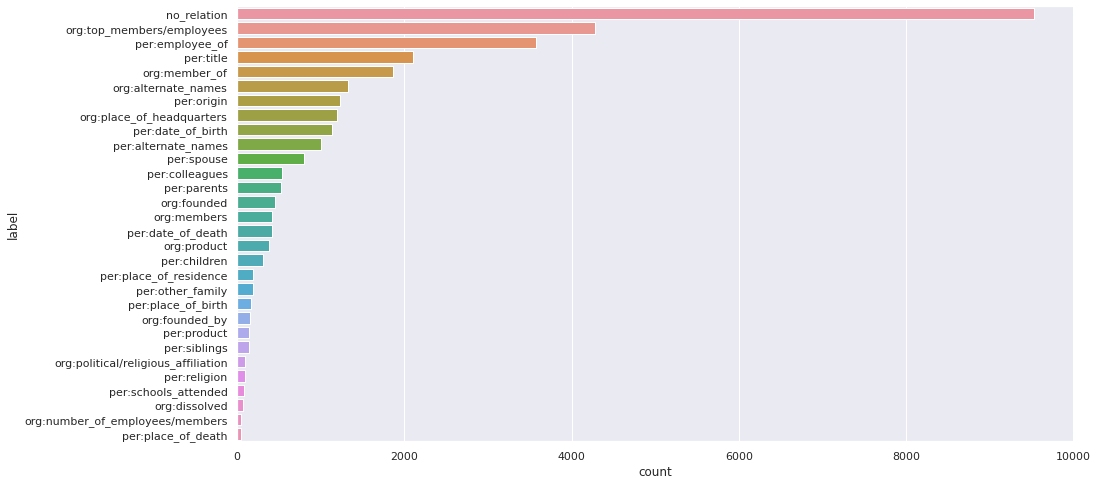

In [90]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(y="label", data=train_df,order = train_df['label'].value_counts().index)

In [157]:
train_df['label'].value_counts()

no_relation                            9534
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
per:date_of_birth                      1130
per:alternate_names                    1001
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             420
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product                     

# 기타
- **source** : wikitree, wikipedia , policy_briefing

# 데이터 제거 리스트(id 번호 제거)
- mislabeling(토의를 통한 것) --->8개
    - 32282,10468 : 박능후 ORG vs POH
    - 277,10202   : 색소폰 no_relation vs title
    - 12829       : 대한항공 top_members vs no_relation
    - 25094       : 전라남도 members vs place
    - 8364        : 김병철 별칭 vs no_relation
    - 22258       : 배트민 거주지 vs no_relation
- sentence, subject, object, label 4가지 모두 중복() --> 41개
    - 8064, 12289, 9351, 22030, 24079, 27793, 16145, 9618, 4248, 6936, 9370, 5530, 6173, 27806, 6306, 13094, 5415, 13993, 24373
    - 22957, 8112, 15280, 4787, 18996, 1721, 13371, 28863, 2500, 4039, 15182, 6749, 1885, 30820, 19172, 1386, 11242, 630, 17142, 27642, 8702, 255
- 2000 vs 7000 같은 것
    - 추후 추가 예정

# 중복 제거할 때 사용
- 경우 1 : 2개 pair 및 label 같은 경우 -> 중복제거 ok -> 해결
- 경우 2 : 2개 pari 및 label 다른 경우 -> 토의 참고해서 index 매칭 후 검사해야 함 ->해결
- 경우 3 : 3개(색소폰) -> 277,3296,10202 중 3296남기면 됨 -> 해결
- 경우 4 : 4개(박능후) -> 32282,24373,10468,20757 중 24373,20757 남기면 됨  // 32282,10468이 같은거 -> 해결-> 
    - 4개 ->1개가 되어야 하기에 추가적으로 수정(나연님)

## 결론 : 이러한 과정을 통해 41개의 중복 & Mislabeling 데이터를 제거할 수 있었다.